<a href="https://colab.research.google.com/github/math8485/Deep-learning/blob/main/Deep_learning_assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = sns.load_dataset("penguins")

In [5]:
data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
#removeing Nan
data = data.dropna(axis=0)

In [7]:
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [9]:
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

In [10]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [11]:
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [57]:
data.columns


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
def nn(bill_depth_mm, w):
    """Output function y = bill_depth_mm * w"""
    return bill_depth_mm * w


def loss(y, t):
    """Calculate the Mean Squared Error"""
    return np.mean((t - y)**2)

In [13]:
# Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
data_s = pd.DataFrame(data_scaled, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [14]:
data_s.shape

(333, 4)

In [58]:
from sklearn.model_selection import train_test_split

X = data_s[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']].values
y = data['sex'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data and labels
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the resampled data
# You can split this resampled data into train and validation sets for model training
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

# Train your model on the resampled data

In [60]:
# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [61]:
X_train_tensor

tensor([[0.3418, 0.6190, 0.4444],
        [0.5818, 0.2381, 0.7778],
        [0.3055, 0.5714, 0.1389],
        [0.6000, 0.3452, 0.8611],
        [0.8364, 0.3452, 0.8750],
        [0.3382, 0.6429, 0.3264],
        [0.7527, 0.8214, 0.5139],
        [0.3782, 0.4286, 0.1806],
        [0.2182, 0.6548, 0.2778],
        [0.3382, 0.6548, 0.2778],
        [0.6727, 0.7500, 0.3056],
        [0.2109, 0.6548, 0.1250],
        [0.2400, 0.7024, 0.2083],
        [0.6218, 0.2500, 1.0000],
        [0.1309, 0.4643, 0.1806],
        [0.2727, 0.6786, 0.5278],
        [0.1309, 0.4590, 0.1560],
        [0.5091, 0.6071, 0.1528],
        [0.4182, 0.0952, 0.6111],
        [0.6909, 0.3810, 0.9167],
        [0.6800, 0.7024, 0.3889],
        [0.7055, 0.6667, 0.1528],
        [0.4073, 0.0357, 0.4722],
        [0.4982, 0.1310, 0.5556],
        [0.5236, 0.1548, 0.6111],
        [0.1891, 0.4405, 0.0833],
        [0.6800, 0.6429, 0.4861],
        [0.1636, 0.5595, 0.2778],
        [0.6473, 0.3571, 0.7500],
        [0.247

In [63]:
# Initializing Hyperparameters
epochs = 40
learning_rate = 0.2

# # Initializing Parameters
w = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net3 = torch.nn.Sequential(torch.nn.Linear(3, 5),
                                 torch.nn.LeakyReLU(),
                                 torch.nn.Dropout(0.20),

                                 torch.nn.Linear(5, 3),
                                 torch.nn.LeakyReLU(),
                                 torch.nn.Dropout(0.20),

                                 torch.nn.Linear(3, 4),
                                 torch.nn.LeakyReLU(),
                                 torch.nn.Dropout(0.20),

                                 torch.nn.Linear(4, 1),
                                 torch.nn.Sigmoid(),
                                )

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net3.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net3.forward(X_train_tensor[i].reshape(1, 3))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


      # # Display the loss for the current sample
      # print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")


<ipython-input-63-4e43dceaae90>:35: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/40 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.7146
--------------------------------------------------


Epoch 2 Average Loss: 0.7117
--------------------------------------------------


Epoch 3 Average Loss: 0.7103
--------------------------------------------------


Epoch 4 Average Loss: 0.7112
--------------------------------------------------


Epoch 5 Average Loss: 0.7118
--------------------------------------------------


Epoch 6 Average Loss: 0.7106
--------------------------------------------------


Epoch 7 Average Loss: 0.7115
--------------------------------------------------


Epoch 8 Average Loss: 0.7116
--------------------------------------------------


Epoch 9 Average Loss: 0.7109
--------------------------------------------------


Epoch 10 Average Loss: 0.7107
--------------------------------------------------


Epoch 11 Average Loss: 0.7112
--------------------------------------------------


Epoch 12 Average Loss: 0.7108
--------------------------------------------------


Epoch 13 Ave

In [76]:
# Initializing Hyperparameters
epochs = 40
learning_rate = 0.05


# # Initializing Parameters
w = 0.05

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net3 = torch.nn.Sequential(torch.nn.Linear(3, 5),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.20),

                                 torch.nn.Linear(5, 4),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.20),

                                 torch.nn.Linear(4, 1),
                                 torch.nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net3.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net3.forward(X_train_tensor[i].reshape(1, 3))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


      # # Display the loss for the current sample
      # print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")


<ipython-input-76-3b125cfce3ab>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/40 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.7006
--------------------------------------------------


Epoch 2 Average Loss: 0.6982
--------------------------------------------------


Epoch 3 Average Loss: 0.6983
--------------------------------------------------


Epoch 4 Average Loss: 0.6984
--------------------------------------------------


Epoch 5 Average Loss: 0.6983
--------------------------------------------------


Epoch 6 Average Loss: 0.6981
--------------------------------------------------


Epoch 7 Average Loss: 0.6981
--------------------------------------------------


Epoch 8 Average Loss: 0.6982
--------------------------------------------------


Epoch 9 Average Loss: 0.6983
--------------------------------------------------


Epoch 10 Average Loss: 0.6981
--------------------------------------------------


Epoch 11 Average Loss: 0.6979
--------------------------------------------------


Epoch 12 Average Loss: 0.6974
--------------------------------------------------


Epoch 13 Ave

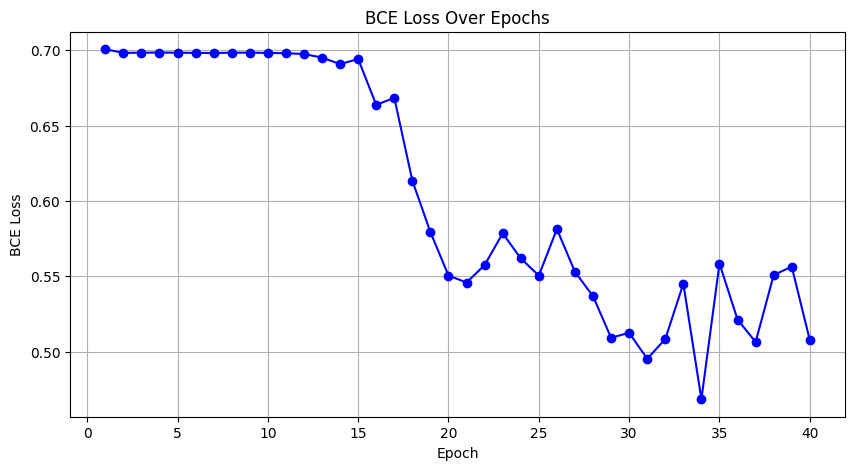

In [77]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

In [78]:
# Initializing Hyperparameters
epochs = 60
learning_rate = 0.05


# # Initializing Parameters
w = 0.05

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net3 = torch.nn.Sequential(torch.nn.Linear(3, 5),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.20),

                                 torch.nn.Linear(5, 4),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.20),

                                 torch.nn.Linear(4, 1),
                                 torch.nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net3.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net3.forward(X_train_tensor[i].reshape(1, 3))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


      # # Display the loss for the current sample
      # print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-78-08641cc6ed6a>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/60 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.7027
--------------------------------------------------


Epoch 2 Average Loss: 0.6954
--------------------------------------------------


Epoch 3 Average Loss: 0.6907
--------------------------------------------------


Epoch 4 Average Loss: 0.6740
--------------------------------------------------


Epoch 5 Average Loss: 0.6473
--------------------------------------------------


Epoch 6 Average Loss: 0.5766
--------------------------------------------------


Epoch 7 Average Loss: 0.5247
--------------------------------------------------


Epoch 8 Average Loss: 0.4830
--------------------------------------------------


Epoch 9 Average Loss: 0.4909
--------------------------------------------------


Epoch 10 Average Loss: 0.4178
--------------------------------------------------


Epoch 11 Average Loss: 0.5156
--------------------------------------------------


Epoch 12 Average Loss: 0.4726
--------------------------------------------------


Epoch 13 Ave

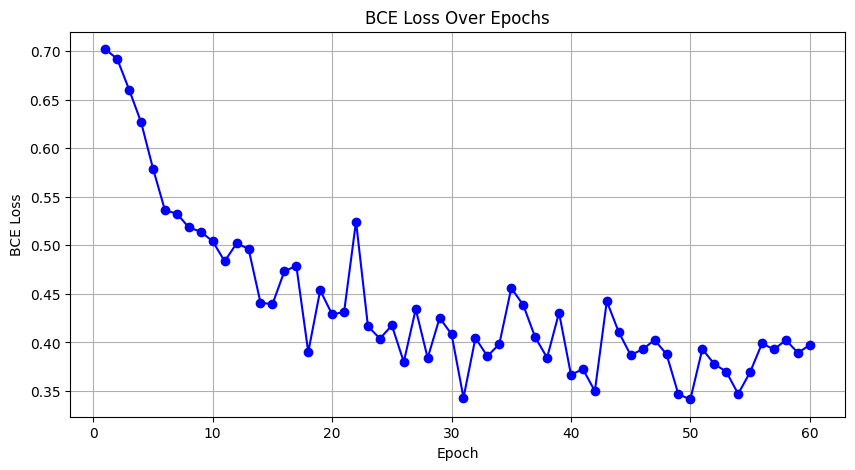

In [66]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

In [67]:
# Now lets save our trained model
# save the trained model
torch.save(model_net3, 'model_net3.pkl')

In [68]:
model_net3_trained = torch.load('model_net3.pkl')

# Set the Model to Evaluation Mode
model_net3_trained.eval()

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=5, out_features=4, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=4, out_features=1, bias=True)
  (7): Sigmoid()
)

In [69]:
output

tensor([[0.8406]], grad_fn=<SigmoidBackward0>)

In [70]:
# Initialize a variable to store the total loss
total_loss = 0.0

# Initialize a variable to store all the predictions
all_predictions = []

# Loop over each sample in the test dataset
for i in range(X_test_tensor.size(0)):

    # Forward pass: compute predicted y by passing x to the model
    output = model_net3(X_test_tensor[i].reshape(-1))

    # Compute and print loss
    loss = loss_BCE(output, y_test_tensor[i].reshape(-1))
    total_loss += loss.item()

    # Store the predictions
    all_predictions.append(output.detach().numpy())

# Calculate the average loss over all test samples
average_loss = total_loss / X_test_tensor.size(0)
print(f'Average Loss on Test Set: {average_loss:.4f}')

# Convert all_predictions to a tensor for further calculations
all_predictions_tensor = torch.tensor(all_predictions).squeeze()

Average Loss on Test Set: 0.3821


In [71]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [72]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[27  3]
 [ 7 30]]


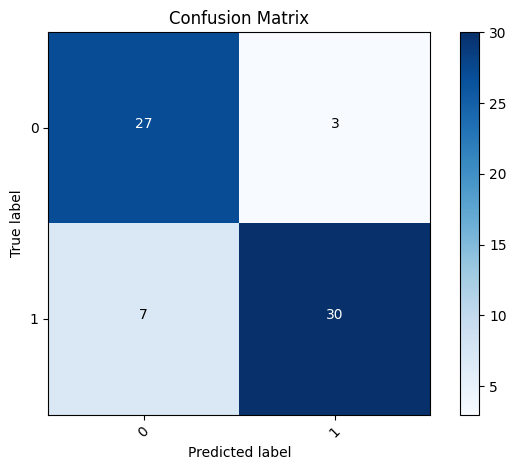

In [73]:
# Convert predicted probabilities to binary labels
threshold = 0.70
predicted_labels = (all_predictions_tensor > threshold).long()

# Calculate confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), predicted_labels.numpy())

# Plot confusion matrix
plot_confusion_matrix(cm, classes=[0, 1], title='Confusion Matrix')
plt.show()


In [74]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.8507462686567164